In [1]:
import matplotlib.pyplot as plt
import operator
import copy
import numpy as np

In [2]:
def getFileTab(f):
    fp = open(f,'r')
    line = fp.readline()
    r=0
    b=0
    c=0
    h=0
    while line:
        if ('R' in line):
            comb,val = line.split(" ") 
            r=max(float(val[:-1]),0)
        if ('B' in line):
            comb,val = line.split(" ") 
            b=max(float(val[:-1]),0)
        if ('C' in line):
            comb,val = line.split(" ") 
            c=max(float(val[:-1]),0)
        if ('H' in line):
            comb,val = line.split(" ") 
            h=max(float(val[:-1]),0)
        line = fp.readline()
    fp.close()
    return r,b,c,h

In [13]:
def getAllContrib(i,j,ind = 1):
    pourcentages = [15,30,50,70,90]
    res = dict()
    resMCS = dict()
    val = dict()
    for k in range(i,j+1):
        res[k] = getFileTab("Contrib"+str(ind)+"/CalculContribMarginale_"+str(k)+".txt")
    val[100] = res
    for p in pourcentages:
        resMCS = dict()
        for k in range(i,j+1):
            resMCS[k] = getFileTab("Contrib"+str(ind)+"/CalculContribMarginaleRSV"+str(p)+"_"+str(k)+".txt")
        val[p] = resMCS
    return val

In [14]:
getAllContrib(1,9)

{15: {1: (0.0, 0.0, 0.0, 0.0),
  2: (0.0, 0.0, 1.1111111111111112, 0.0),
  3: (0.2777777777777778,
   9.722222222222223,
   4.722222222222222,
   4.444444444444445),
  4: (2.5000000000000004,
   9.722222222222223,
   5.555555555555556,
   6.111111111111112),
  5: (0, 1.388888888888889, 1.9444444444444446, 5.277777777777779),
  6: (5.277777777777779,
   8.333333333333334,
   16.111111111111114,
   13.333333333333334),
  7: (0, 16.944444444444446, 3.3333333333333335, 16.38888888888889),
  8: (7.500000000000001,
   28.611111111111114,
   34.44444444444445,
   36.111111111111114),
  9: (0, 42.77777777777778, 38.611111111111114, 37.50000000000001)},
 30: {1: (0.0, 0.0, 0.5555555555555556, 1.2500000000000002),
  2: (0.0, 1.1111111111111112, 2.361111111111111, 1.6666666666666667),
  3: (0, 2.361111111111111, 5.694444444444445, 2.361111111111111),
  4: (0.8333333333333334,
   11.666666666666668,
   8.055555555555557,
   10.000000000000002),
  5: (1.1111111111111112,
   11.666666666666668,
   9

In [12]:
def mcsHist(k,valeurs):
    pourcentages = [15,30,50,70,90,100]
    X = np.arange(4)
    plt.ylabel('Contribution \n Marginale',size=25);
    plt.xlabel('Nombre agent : '+str(k),size=25);
    cpt = 0
    for i in pourcentages:
        cpt +=1
        x=valeurs[i][k]
        plt.bar(X+4*cpt, x,color=['red', 'green', 'blue', 'yellow'], width = 1)
    #plt.hist(x, normed=True, bins=30)
    plt.xticks([4*r+6 for r in range(len([0,15,30,50,70,90,100]))],[15,30,50,70,90,100])
    plt.show()

In [15]:
def allGraph(i,j,nmax=100):
    val = getAllContrib(i,j)
    for k in range(i,j+1):
        mcsHist(k,val)

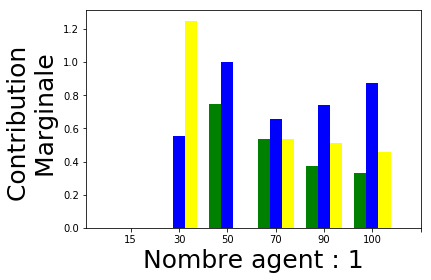

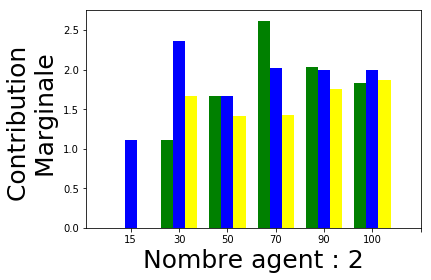

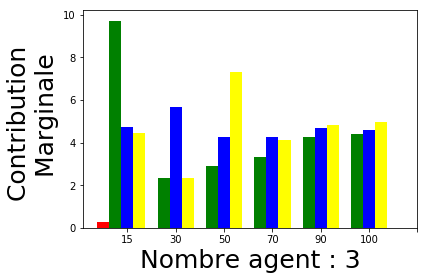

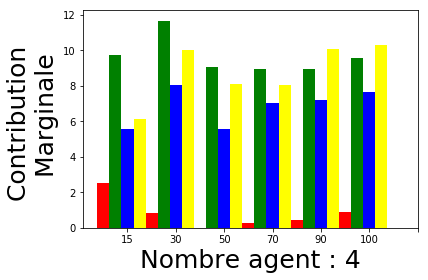

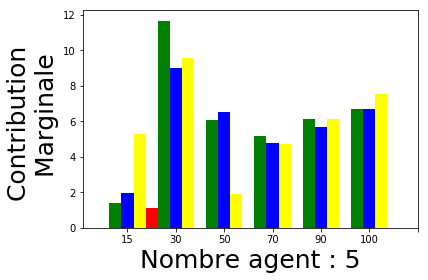

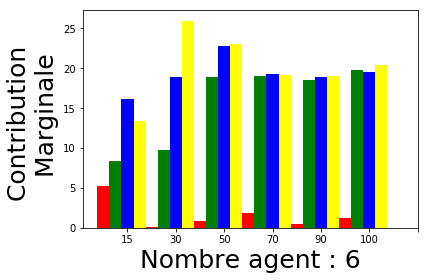

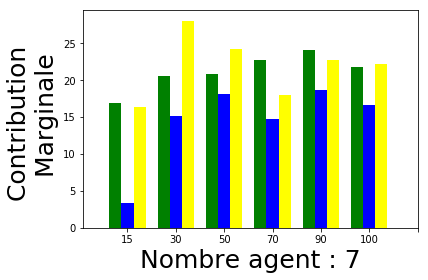

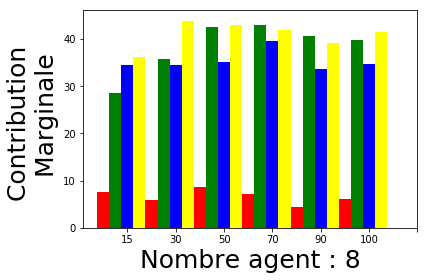

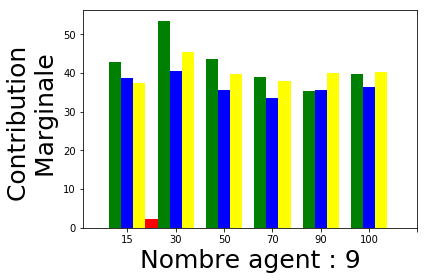

In [16]:
allGraph(1,9)

In [43]:
def calculateErrorMargin(i,j):
    val = dict()
    val[1] = getAllContrib(i,j,1)
    val[2] = getAllContrib(i,j,2)
    val[3] = getAllContrib(i,j,3)

    k = [15,30,50,70,90]
    error = dict()
    for k in val[1].keys():
        error[k]=dict()
        for ind in val[1][k].keys():
            rt,bt,ct,ht = val[1][100][ind]
            r,b,c,h = val[1][k][ind]
            r1,b1,c1,h1 = val[2][k][ind]
            r2,b2,c2,h2 = val[3][k][ind]
            r=(r+r1+r2)/3
            b=(b+b1+b2)/3
            c=(c+c1+c2)/3
            h=(h+h1+h2)/3
            d_r=abs(rt-r)
            d_b=abs(bt-b)
            d_c=abs(ct-c)
            d_h=abs(ht-h)
            if(rt!=0):
                er_r =d_r/rt
            else:
                er_r=0
            if(bt!=0):
                er_b = d_b/bt
            else:
                er_b = 0
            if(ct!=0):
                er_c=d_c/ct
            else:
                er_c=0
            if(ht!=0):
                er_h=d_h/ht
            else:
                er_h=0
            error[k][ind]=dict()
            error[k][ind]['r']=er_r
            error[k][ind]['b']=er_b
            error[k][ind]['c']=er_c
            error[k][ind]['h']=er_h
            error[k][ind]['m']=(er_r+er_b+er_c+er_h)/4
    return error

In [49]:
def affichageError(i,j,t='m'):
    plt.figure(figsize=(20, 5))
    er = calculateErrorMargin(i,j)
    errors=dict()
    for k in [15,30,50,70,90]:
        errors[k]=[]
        for ind in er[k].keys():
            errors[k].append(er[k][ind][t])
        plt.plot(range(1,10),errors[k],label = k)
    plt.xlabel("Nombre d'agent dans la coalition")
    plt.ylabel("Taux d'erreur")
    plt.legend(loc='upper left')
    plt.show()

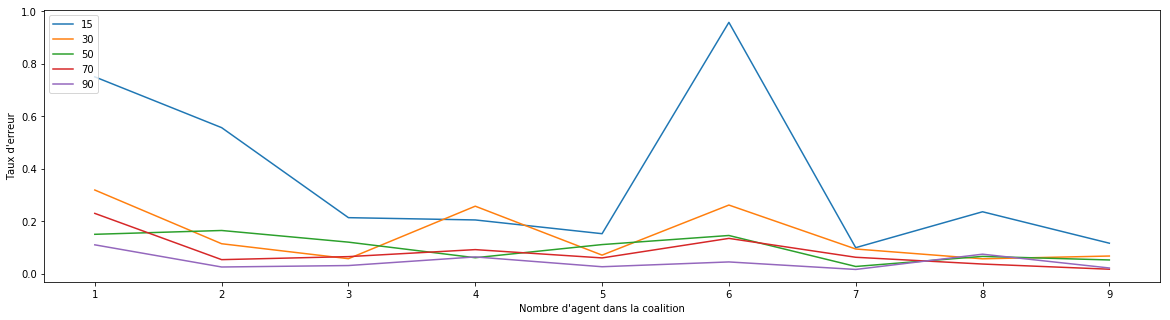

In [50]:
affichageError(1,9)

Random


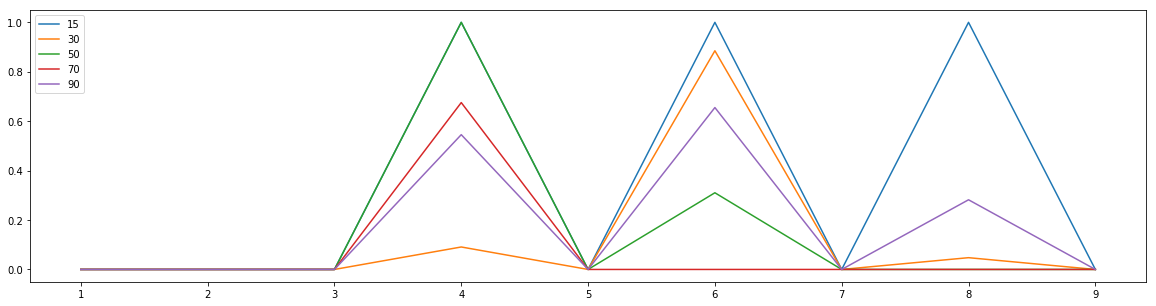

Bas


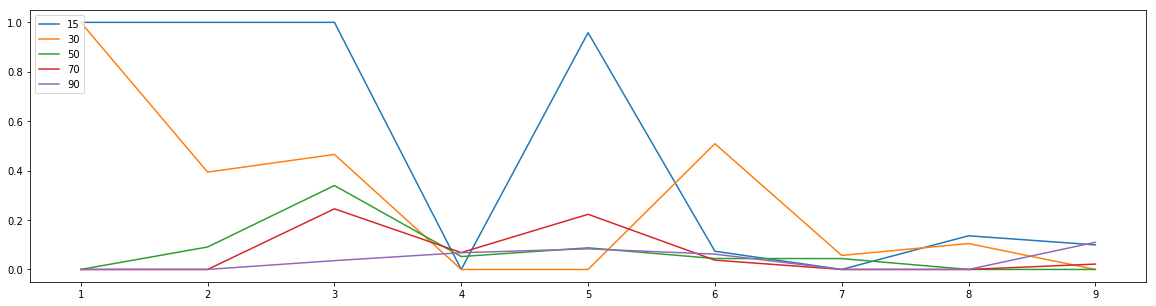

Complet


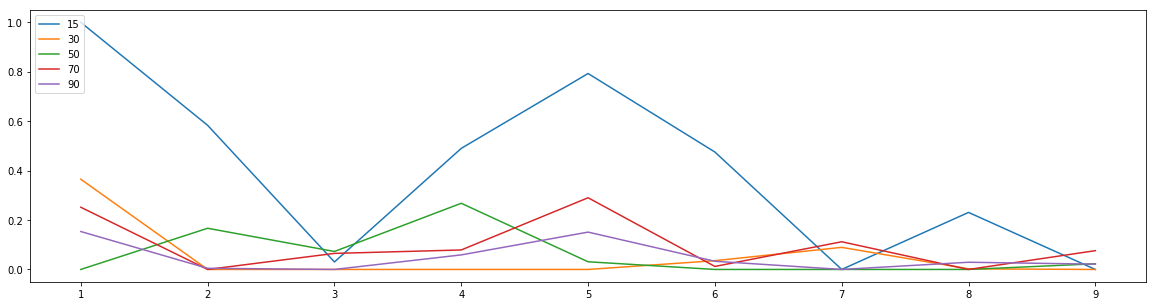

Haut


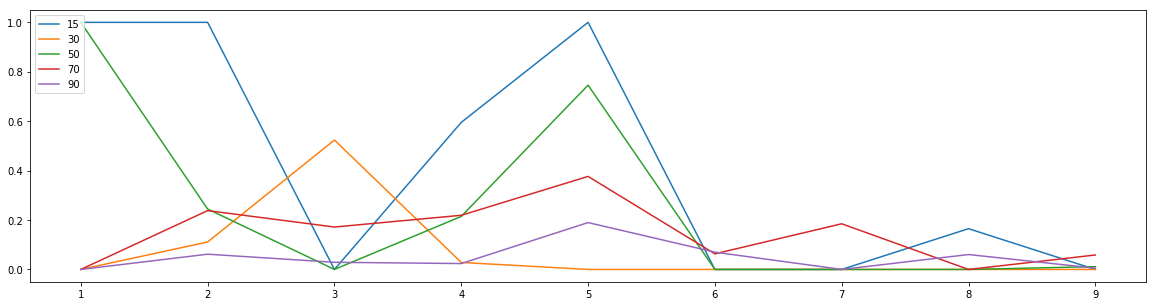

In [126]:
print("Random")
affichageError(1,9,'r')
print("Bas")
affichageError(1,9,'b')
print("Complet")
affichageError(1,9,'c')
print("Haut")
affichageError(1,9,'h')